In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import leastsq 
import matplotlib.pyplot as plt

In [2]:
Cs137 = pd.read_csv("Co60_left.csv")
Cs137

,cond,run,count,thickness,count_err
0,Pb*4,11,5659.76343,9.136750,240.658796
1,Pb*3,12,7206.31423,6.753250,284.925712
2,Pb*2,13,7421.46463,4.483250,259.955077
3,Pb*1,14,9089.34299,2.298375,328.277402
4,Pb*0,15,10431.60420,0.000000,310.441281
5,Al*4,26,8831.51459,4.394250,314.968037
6,Al*3,27,8779.33022,3.294000,311.743043
7,Al*2,28,9740.81277,2.193750,327.524963
8,Al*1,29,10153.26430,1.093500,339.040382
9,Al*0,30,10651.69300,0.000000,312.010881


In [3]:
thick = np.array(Cs137["thickness"])
count = np.array(Cs137["count"])
err = np.array(Cs137["count_err"])

## Pb


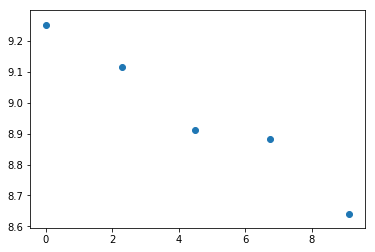

In [4]:
plt.scatter(thick[0:5],np.log(count[0:5]))

## Al

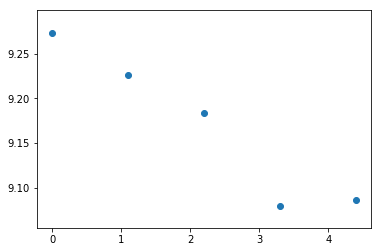

In [5]:
plt.scatter(thick[5:10],np.log(count[5:10]))

In [6]:
def func(x, a1, a2):
    return a1 +a2*x

def fit_func(param, x, y, err):
    a1, a2 = param
    residual = (y - func(x, a1, a2))/err
    return residual


b1     : 9.249856402903783
b1_err : 0.02484620806719043
b2     : -0.0640453151898471
b2_err : 0.005016030532219379
reduced_chi_square : 1.7497524838135712


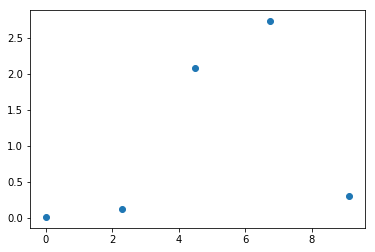

In [7]:
param = [0, 0]
result = leastsq(fit_func, param, args=(thick[0:5], np.log(count[0:5]),err[0:5]/count[0:5]), full_output=True)

b1, b2 = result[0]
b1_err = np.sqrt(result[1][0, 0])
b2_err = np.sqrt(result[1][1, 1])

print("b1     : "+ str(b1))
print("b1_err : " + str(b1_err))
print("b2     : "+ str(b2))
print("b2_err : "+ str(b2_err))

chi = fit_func((b1, b2), thick[0:5], np.log(count[0:5]), err[0:5]/count[0:5])
plt.scatter(thick[0:5], chi*chi)

chi_square = sum(chi*chi)
print("reduced_chi_square : " + str(chi_square /3) )

c1     : 9.274118075568555
c1_err : 0.02389557609405832
c2     : -0.0473518399398527
c2_err : 0.009421395882924167
reduced_chi_square : 0.5464204987915113


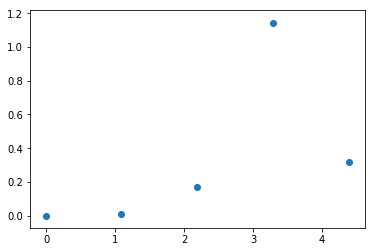

In [8]:
param = [0, 0]
result = leastsq(fit_func, param, args=(thick[5:10], np.log(count[5:10]), err[5:10]/count[5:10]), full_output=True)

c1, c2 = result[0]
c1_err = np.sqrt(result[1][0, 0])
c2_err = np.sqrt(result[1][1, 1])

print("c1     : "+ str(c1))
print("c1_err : " + str(c1_err))
print("c2     : "+ str(c2))
print("c2_err : "+ str(c2_err))

chi = fit_func((c1, c2), thick[5:10], np.log(count[5:10]), err[5:10]/count[5:10])
plt.scatter(thick[5:10], chi*chi)

chi_square = sum(chi*chi)
print("reduced_chi_square : " + str(chi_square /3) )

In [ ]:
fig = plt.figure(figsize=(10, 9))

ax1 =fig.add_subplot(2,1,1)
ax2 =fig.add_subplot(2,1,2)

#plot_Pb
ax1.set_title("Pb")
ax1.set_xlabel("Thickness[g/cm^2]")
ax1.set_ylabel("Counts")
ax1.set_yscale("log")

ax1.scatter(thick[0:5], count[0:5],c="pink", alpha=0.5, linewidths="2",edgecolors="red",label="data")
#ax1.set_xlim(-10,110)
ax1.set_ylim(1000,100000)
x_1 = np.linspace(-0.25,10)
ax1.plot(x_1, np.exp(func(x_1, b1, b2)),label="f(x)")
ax1.errorbar(thick[0:5], count[0:5], yerr=err[0:5],fmt="none", ecolor="g")
ax1.legend()

#plot_Al
ax2.set_title("Al")
ax2.set_xlabel("Thickness[g/cm^2]")
ax2.set_ylabel("Counts")
ax2.set_yscale("log")

ax2.scatter(thick[5:10], count[5:10],c="pink", alpha=0.5, linewidths="2",edgecolors="red",label="data")
#ax2.set_xlim(-0.5,5)
ax2.set_ylim(1000,100000)
x_2 = np.linspace(-0.25,4.75)
ax2.plot(x_2, np.exp(func(x_2, c1, c2)),label="g(x)")
ax2.errorbar(thick[5:10], count[5:10], yerr=err[5:10], fmt="none", ecolor="g")
ax2.legend()


fig.tight_layout()
plt.savefig("Co60_left.png")
#plt.show()